# Libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy

# Versions

In [2]:
!python --version

Python 2.7.13 :: Anaconda 4.4.0 (x86_64)


In [3]:
items = [("Numpy", np), ("Pandas", pd), ("Matplotlib", matplotlib), ("Seaborn", sns)]
for item in items:
    print item[0] + " version: " + str(item[1].__version__)

Numpy version: 1.13.0
Pandas version: 0.20.1
Matplotlib version: 2.0.2
Seaborn version: 0.7.1


# Get Data

In [4]:
# Read from disk
data = pd.read_hdf('/Users/davidziganto/Work/data/simulated_messy_data.h5', 'table')

# EDA

Insert text explanation here about what to look for...

### [1] Check For Inf

In [5]:
inf_indx = np.where(data==np.inf)
inf_indx

(array([3492]), array([9]))

#### [1.1] Replace Inf w/Avg Value

In [6]:
# Replace w/NaN as setup to get mean
data.iloc[inf_indx[0], inf_indx[1]] = np.nan

### [2] Check For Nulls

In [7]:
data.isnull().sum()

degree        0
age           0
gender        0
major         0
gpa           0
experience    1
bootcamp      0
github        1
blog          0
articles      1
hired         0
dtype: int64

In [8]:
np.where(data.isnull())

(array([  11,   12, 3492]), array([5, 7, 9]))

#### [2.1] Replace Nulls w/Avg Value

In [9]:
data.fillna(value=data.mean(), inplace=True).head()

,degree,age,gender,major,gpa,experience,bootcamp,github,blog,articles,hired
0,1,25,1,5,1.15,14.0,0,3.0,1,7.0,1
1,1,21,0,0,3.61,5.0,0,5.0,0,31.0,0
2,0,45,1,6,2.39,24.0,1,14.0,0,35.0,1
3,3,54,1,5,1.98,23.0,0,19.0,1,13.0,0
4,0,51,1,7,1.98,44.0,0,14.0,0,24.0,0


#### [2.2] Double-Check

In [10]:
data.isnull().sum()

degree        0
age           0
gender        0
major         0
gpa           0
experience    0
bootcamp      0
github        0
blog          0
articles      0
hired         0
dtype: int64

#### [2.3] Class Balance

In [11]:
data.hired.mean()

0.4258

# Describe() DF

In [12]:
data.describe()

,degree,age,gender,major,gpa,experience,bootcamp,github,blog,articles,hired
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.517000,39.36360,0.500800,3.521200,2.507242,17.877375,0.491400,9.754751,0.496800,20.044409,0.425800
std,1.119983,12.79011,0.500049,2.274068,0.872884,12.935108,0.499976,6.025075,0.500839,11.784032,0.494513
min,0.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.00000,0.000000,2.000000,1.740000,7.000000,0.000000,5.000000,0.000000,10.000000,0.000000
50%,2.000000,39.00000,1.000000,4.000000,2.500000,16.000000,0.000000,10.000000,0.000000,20.000000,0.000000
75%,3.000000,50.00000,1.000000,5.000000,3.280000,27.000000,1.000000,15.000000,1.000000,30.000000,1.000000
max,3.000000,143.00000,1.000000,7.000000,4.210000,50.000000,1.000000,20.000000,2.000000,40.000000,1.000000


# Boxplot

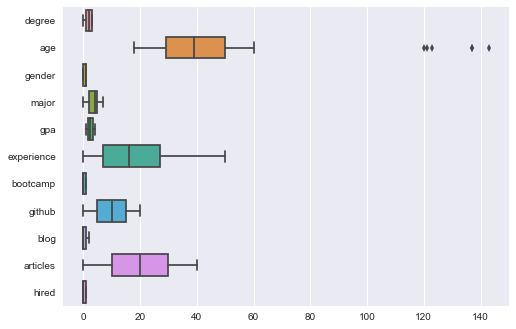

In [13]:
sns.boxplot(data=data, orient='h');

We see some anomalous behavior wrt age. It appears that there are some strong outliers. May be worth investigating and possibly dropping, though in this case we know age has no impact on the hiring decision. 

# Pair Plots

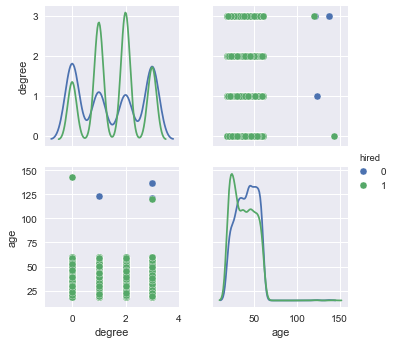

In [14]:
sns.pairplot(data, vars=["degree","age"], hue="hired", diag_kind='kde');

There is strong separation amongst the degree variable. We see strong signals for the 2nd and 3rd degrees. It also appears that younger candidates are more likely to get hired. Keep in mind that age is correlated with experience. In this dataset, experience is one of the primary drivers whereas age has no impact. It just so happens that age looks to be a strong predictor because of its correlation with experience. In other words, younger people tend to have less experience. 

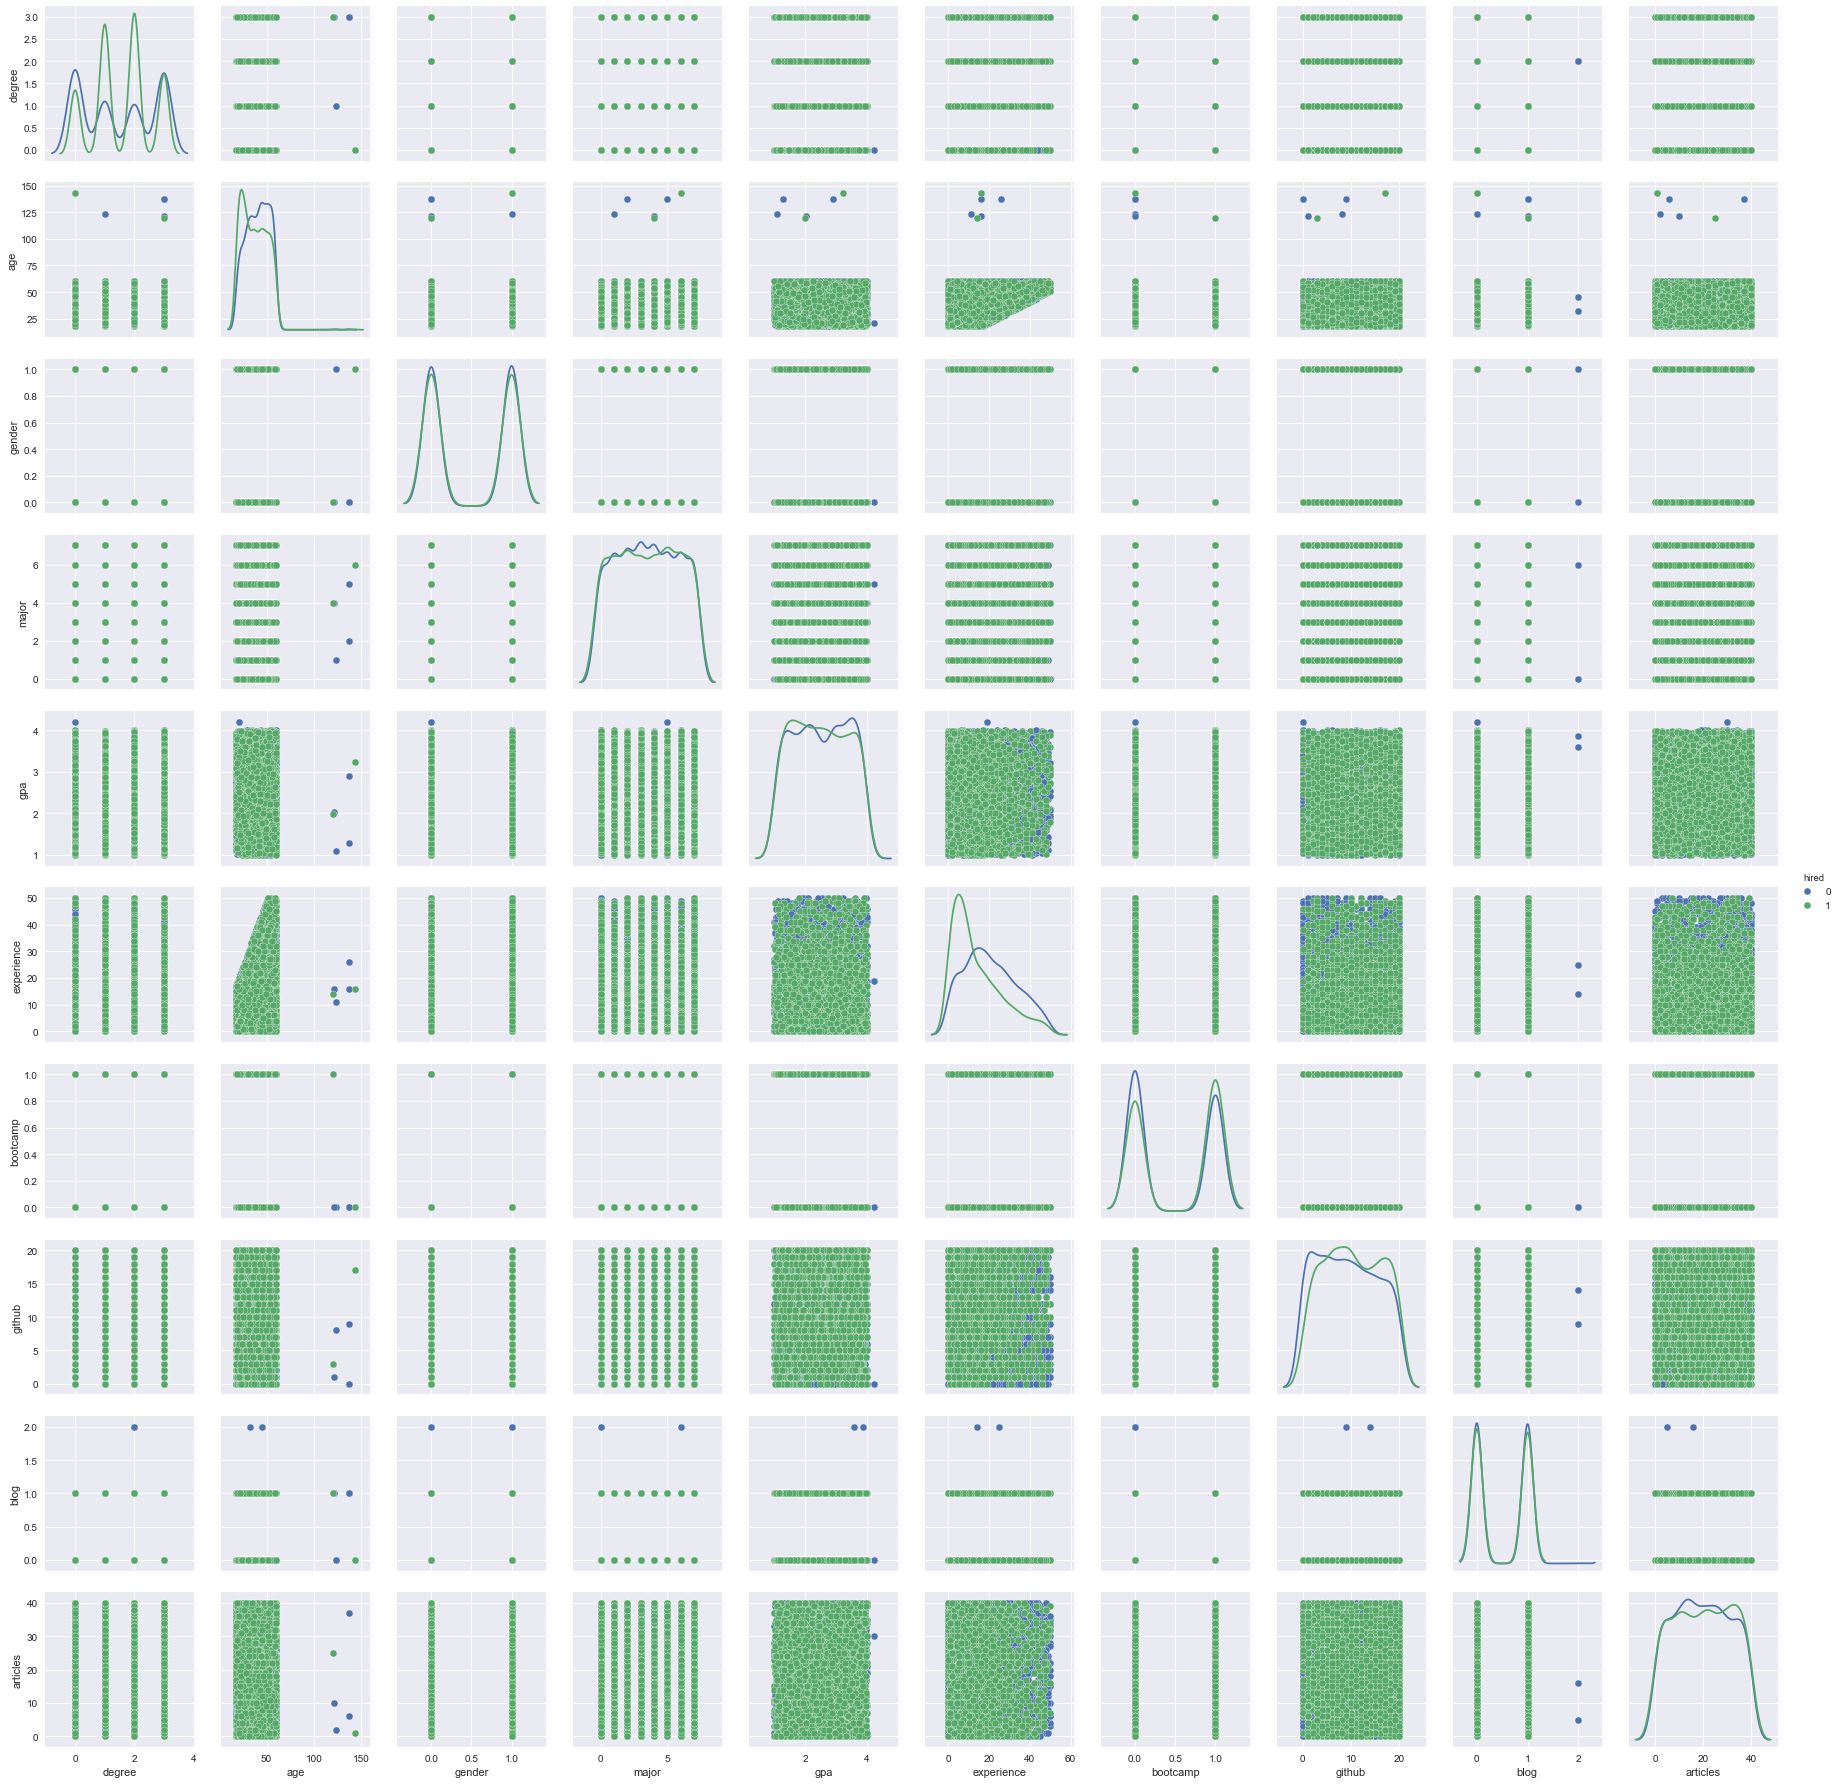

In [15]:
np.seterr(divide='ignore', invalid='ignore')
sns.pairplot(data, 
             vars=['degree','age','gender','major','gpa','experience','bootcamp','github','blog','articles'],
             hue="hired", 
             diag_kind="kde");

# Correlation Matrix

In [16]:
data.corr()

,degree,age,gender,major,gpa,experience,bootcamp,github,blog,articles,hired
degree,1.000000,0.003060,0.015156,0.001390,-0.006904,-0.008492,0.003119,0.008062,0.019889,0.004718,0.042008
age,0.003060,1.000000,-0.015934,-0.000987,-0.013448,0.509429,-0.034328,-0.008105,-0.000349,-0.001460,-0.135527
gender,0.015156,-0.015934,1.000000,0.023558,0.010548,-0.009095,-0.001173,-0.004973,-0.015166,0.026508,-0.002591
major,0.001390,-0.000987,0.023558,1.000000,-0.033159,-0.006188,0.003943,0.013215,0.001640,-0.008216,-0.002603
gpa,-0.006904,-0.013448,0.010548,-0.033159,1.000000,0.004049,-0.017351,0.005929,-0.003994,0.020092,-0.014889
experience,-0.008492,0.509429,-0.009095,-0.006188,0.004049,1.000000,-0.012889,-0.004758,-0.016933,-0.003999,-0.262284
bootcamp,0.003119,-0.034328,-0.001173,0.003943,-0.017351,-0.012889,1.000000,0.017702,-0.002107,-0.001191,0.090462
github,0.008062,-0.008105,-0.004973,0.013215,0.005929,-0.004758,0.017702,1.000000,0.000792,0.003795,0.085394
blog,0.019889,-0.000349,-0.015166,0.001640,-0.003994,-0.016933,-0.002107,0.000792,1.000000,-0.033769,-0.006209
articles,0.004718,-0.001460,0.026508,-0.008216,0.020092,-0.003999,-0.001191,0.003795,-0.033769,1.000000,0.014571


# Feature Importances

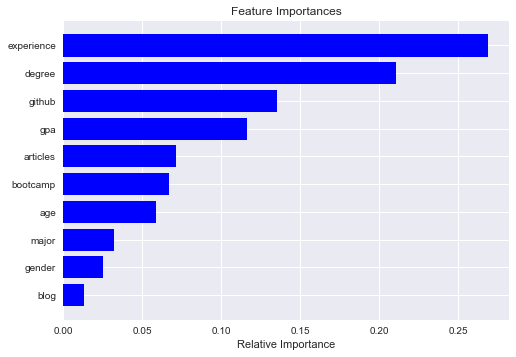

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X = deepcopy(data)
y = X.pop('hired')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier(loss='deviance', 
                                 learning_rate=0.1, 
                                 n_estimators=50, 
                                 subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, 
                                 max_depth=3, 
                                 min_impurity_split=1e-07, 
                                 init=None, 
                                 random_state=123, 
                                 max_features=None, 
                                 verbose=0, 
                                 max_leaf_nodes=None, 
                                 warm_start=False, 
                                 presort='auto')

gbc.fit(X_train, y_train)

features = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices[-15:])), importances[indices], color='b', align='center')
plt.yticks(range(len(indices[-15:])), features[indices])
plt.xlabel('Relative Importance');

# Write Data To Disk

In [18]:
# Write to disk
data.to_hdf('/Users/davidziganto/Work/data/simulated_cleaned_data.h5',
            'table',
            mode='w', 
            append=True, 
            complevel=9, 
            complib='blosc', 
            fletcher32=True)